In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

In [2]:
def check_and_create_folder(folder_path, name_fold = "simu"):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        #return folder_path

    # Look for folders starting with "simu_"
    existing_folders = [name for name in os.listdir(folder_path) if name.startswith(f"{name_fold}_")]
    #print(f"{name}_")
    if not existing_folders:
        new_folder_name = f"{name_fold}_0001"
    else:
        # Sort the existing folders to find the highest numbered folder
        existing_folders.sort()
        last_folder_number = int(existing_folders[-1][len(name_fold)+1:])  # Extract the number from the folder name 
        #print(os.path.join(folder_path, existing_folders[-1]), len(os.listdir(os.path.join(folder_path, existing_folders[-1]))))   
        new_folder_number = last_folder_number  if  len(os.listdir(os.path.join(folder_path, existing_folders[-1]))) ==0 else last_folder_number +1
        #print(new_folder_number)
        new_folder_name = f"{name_fold}_{new_folder_number:04d}"

    new_folder_path = os.path.join(folder_path, new_folder_name)
    os.makedirs(new_folder_path, exist_ok=True)

    return new_folder_path

In [3]:
folder_path = check_and_create_folder("./img")

In [4]:
run_folder = "results/simu_0002"

edge_infos = sorted([f for f in os.listdir(run_folder) if "edge_info" in f], key=lambda x: int(x.split('_')[0]))
vehicle_infos = sorted([f for f in os.listdir(run_folder) if "vehicle_info" in f], key=lambda x: int(x.split('_')[0]))
road_infos = sorted([f for f in os.listdir(run_folder) if "road_info" in f], key=lambda x: int(x.split('_')[0]))

# Road Analysis

In [5]:
road_df = pd.DataFrame(columns=["edge"]+[i+1 for i in range(len(road_infos))])

In [6]:
number_of_requests = []
for i, road_info_name in enumerate(road_infos):
    n = int(road_info_name.split("_")[0])
    ri_df = pd.read_csv(os.path.join(run_folder, road_info_name))
    #do this only once I guess??
    road_df["edge"] = ri_df["edge"]
    number_of_requests += [n+20]
    sum_rows = ri_df[ri_df.columns[2:]].sum(axis=1).astype(int)
    road_df[n] = sum_rows


In [7]:
road_df

,edge,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,42433027-42433020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,42433020-42433027,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,42433020-42433014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42433014-42433020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42433014-42442671,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,42428020-42428007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1618,42428007-42436492,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1619,42428007-42428020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1620,42443054-42450044,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


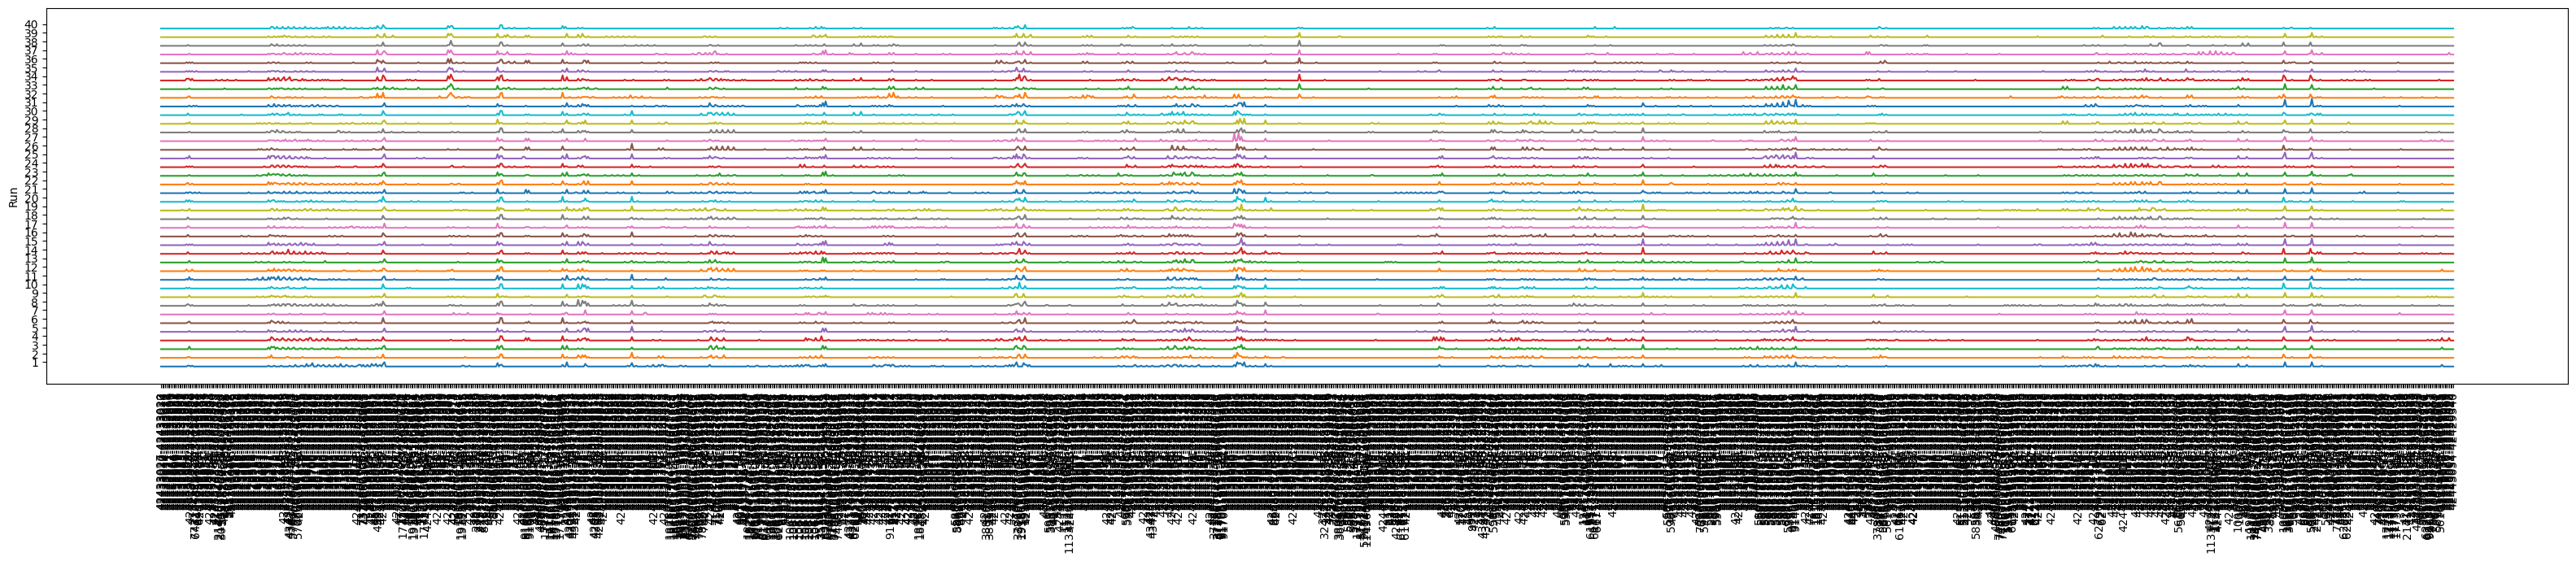

In [8]:
plt.figure(figsize=(40, 6))
max_value = road_df.drop("edge", inplace=False, axis=1).values.max()+1
for i, col in enumerate(road_df.columns[1:]):
    # Add an offset to each series
    offset = max_value * i
    plt.plot(road_df['edge'], road_df[col] + offset, label=col)

# Set ticks and labels for y-axis
plt.yticks([max_value * i + max_value / 2 for i in range(len(road_df.columns[1:]))], road_df.columns[1:])
plt.ylabel('Run')
plt.xticks(rotation='vertical')
#plt.legend()
plt.grid(False)
plt.show()

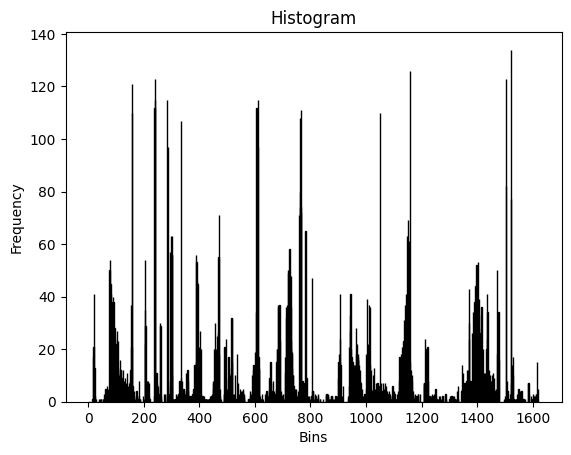

In [9]:
import matplotlib.pyplot as plt


y_values = list(road_df[road_df.columns[1:]].sum(axis=1).astype(int))

x_values = range(1, len(y_values) + 1)

plt.bar(x_values, y_values, color='blue', edgecolor='black')

# Customize labels and title
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()


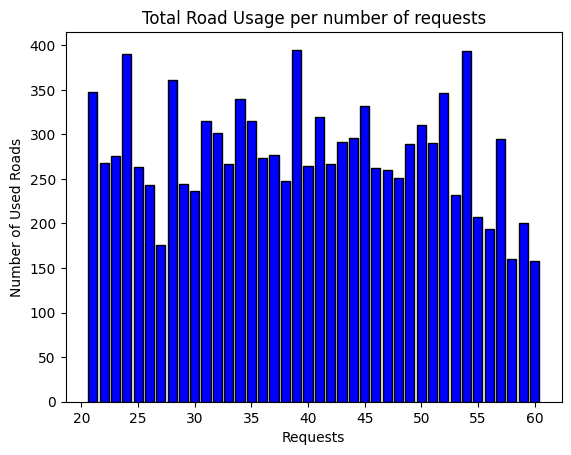

In [10]:
import matplotlib.pyplot as plt


y_values = list(road_df[road_df.columns[1:]].sum(axis=0).astype(int))
x_values = number_of_requests
plt.bar(x_values, y_values, color='blue', edgecolor='black')

# Customize labels and title
plt.xlabel('Requests')
plt.ylabel('Number of Used Roads')
plt.title('Total Road Usage per number of requests')

# Show plot
plt.show()


In [11]:
road_df_total_use = pd.DataFrame()
road_df_total_use['edge'] = road_df["edge"]
road_df_total_use['usage'] = road_df[road_df.columns[1:]].sum(axis=1).astype(int)

In [12]:

minima = min(road_df_total_use['usage'])
maxima = max(road_df_total_use['usage'])

norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Spectral_r)


In [13]:
plt.rcParams.update({'font.size': 44})

/var/folders/b6/t14lv28n5xqdhgq7zcrqwfkm0000gn/T/ipykernel_38384/3364442226.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm,label="Road Usage", orientation="vertical")


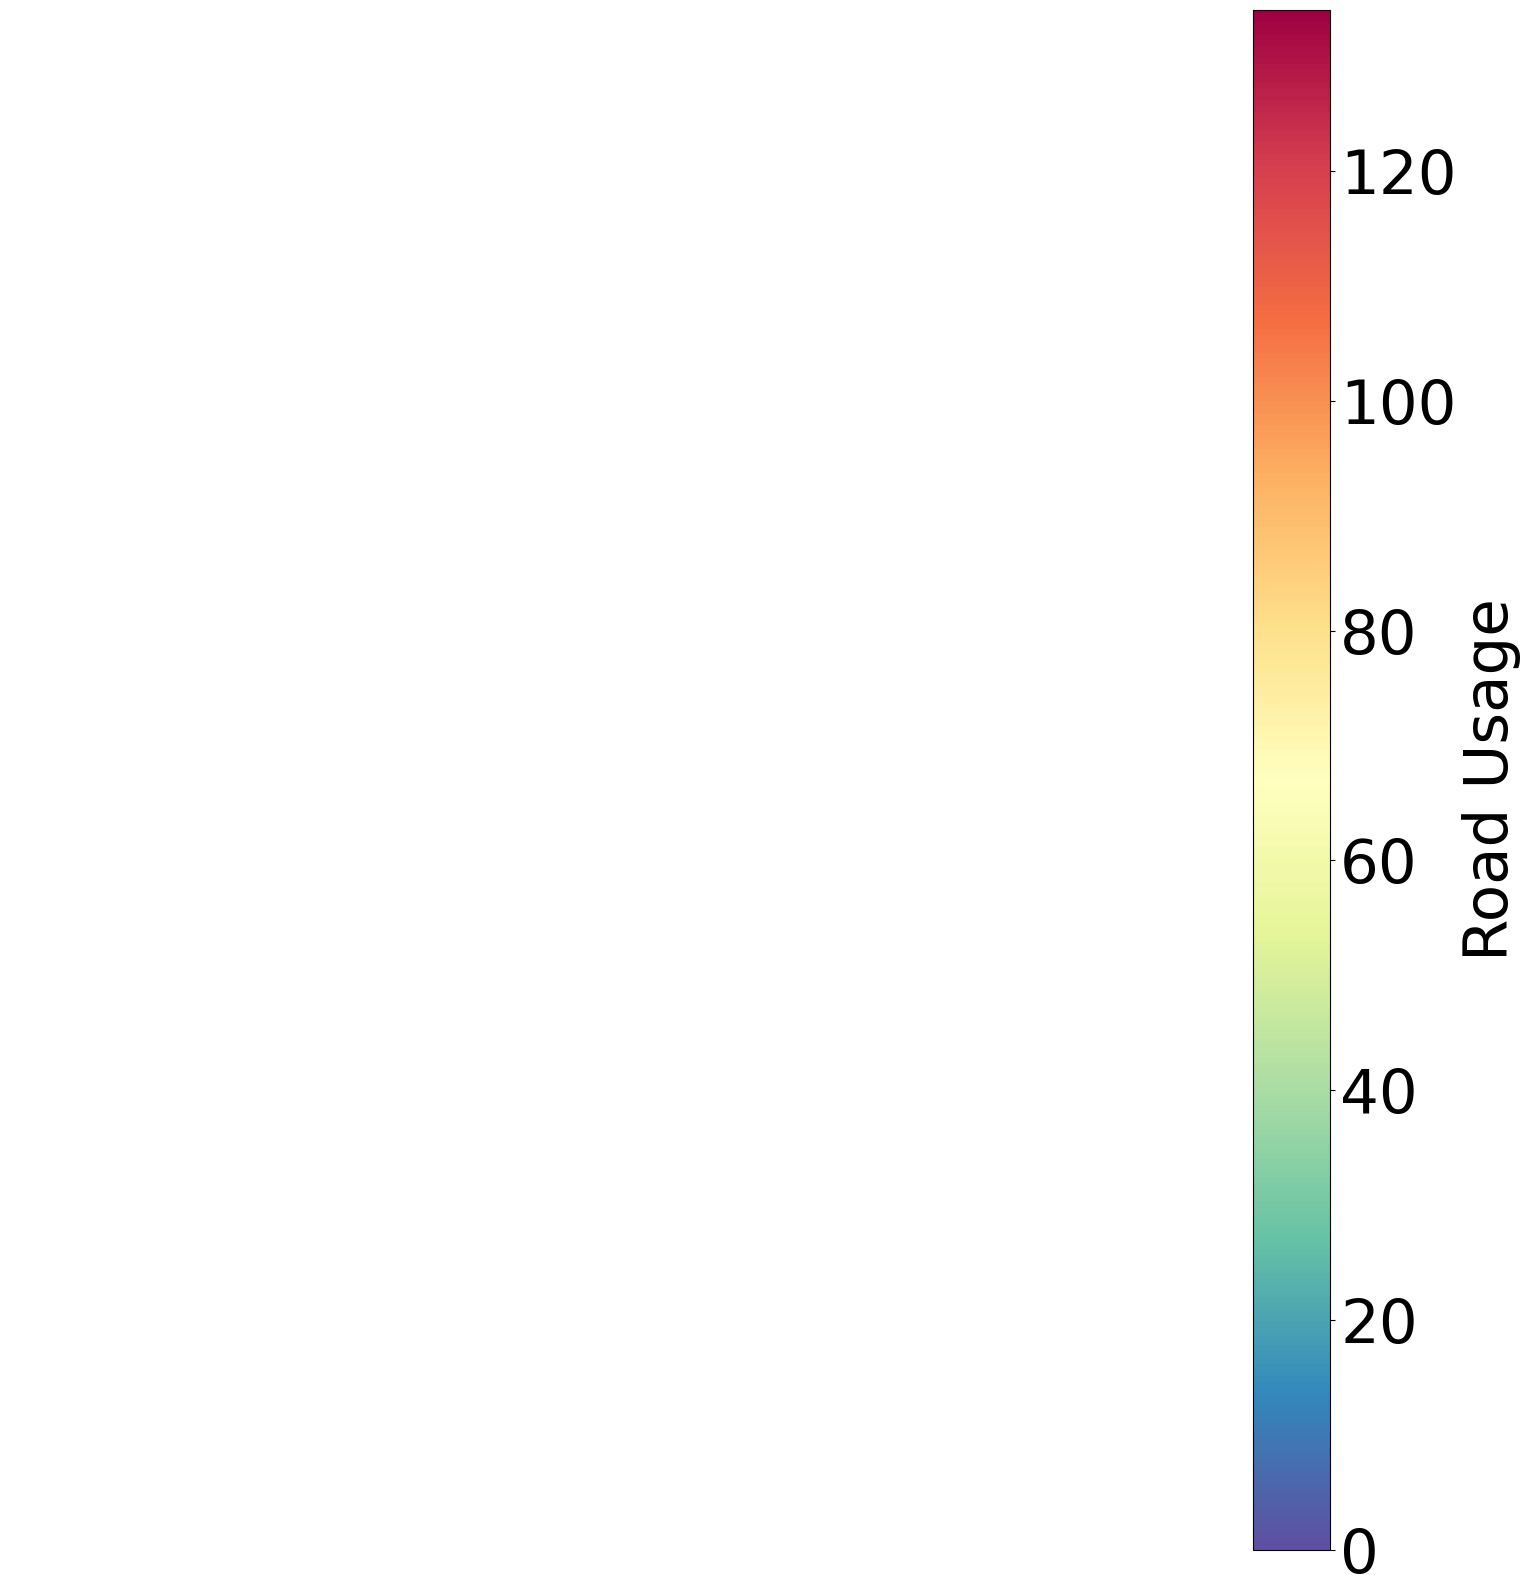

In [14]:
import osmnx as ox
graph = ox.graph_from_place("Manhattan, New York, USA", network_type="drive_service", custom_filter='["highway"~"primary|secondary"]')
fig, ax = ox.plot_graph(graph, node_size=1, show=False, close=False,bgcolor='white', edge_color='black', figsize=(20, 20) )
for edge, usage in zip(road_df_total_use['edge'],road_df_total_use['usage']):
    node1, node2 = int(edge.split("-")[0]), int(edge.split("-")[1])
    #print(node1, node2)
    # Get node coordinates
    x1, y1 = graph.nodes[node1]['x'], graph.nodes[node1]['y']
    x2, y2 = graph.nodes[node2]['x'], graph.nodes[node2]['y']
    # Plot edge

    ax.scatter(x1, y1, color="black", s=2)
    ax.scatter(x2, y2, color="black", s=2)

    ax.plot([x1, x2], [y1, y2], color=mapper.to_rgba(usage), linewidth=4)  # You can adjust color and linewidth as needed





norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima) 
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('Spectral_r'), norm =norm) 

plt.colorbar(sm,label="Road Usage", orientation="vertical") 
plt.savefig(f'{folder_path}/nyc_road_usage.png', dpi=300, bbox_inches='tight')

#plt.show()
ax.clear()

# Vehicle Charge

In [208]:
vehicles_df_iterations = pd.DataFrame(columns=["old_charge", "new_charge", "old_startdepot", "new_startdepot"])
vehicles_df_ids = pd.DataFrame(columns=["old_charge", "new_charge", "old_startdepot", "new_startdepot"])

In [209]:
temp = {}
for i, vehicles_df_name in enumerate(vehicle_infos):
    vi_df = pd.read_csv(os.path.join(run_folder, vehicles_df_name))
    for c in vehicles_df_iterations.columns:
        if c not in temp.keys():
            print(f"{c} is not in the keys")
            temp[c] = []
        temp[c] += [list(vi_df[c])]

vehicles_df_iterations = pd.concat([vehicles_df_iterations, pd.DataFrame.from_dict(temp)], ignore_index=True)

old_charge is not in the keys
new_charge is not in the keys
old_startdepot is not in the keys
new_startdepot is not in the keys


In [210]:
vehicles_df_iterations

,old_charge,new_charge,old_startdepot,new_startdepot
0,"[100.00000000792672, 66.42282962467372, 99.999...","[100.0, 86.42282962467372, 100.0, 79.837413035...","[42432963, 42432963, 42432963, 42430044, 42430...","[42430044, 42430044, 42430044, 42432963, 42432..."
1,"[99.99999999851924, 50.7845533562336, 94.50889...","[100.0, 70.7845533562336, 100.0, 99.8374130503...","[42430044, 42430044, 42430044, 42432963, 42432...","[42432963, 42432963, 42432963, 42430044, 42430..."
2,"[100.00000000291084, 70.78455336378913, 98.420...","[100.0, 90.78455336378912, 100.0, 87.204217828...","[42432963, 42432963, 42432963, 42430044, 42430...","[42430044, 42430044, 42430044, 42432963, 42432..."
3,"[100.0000000033884, 48.25945901978107, 34.6148...","[100.0, 68.25945901978108, 54.61487085236834, ...","[42430044, 42430044, 42430044, 42432963, 42432...","[42432963, 42432963, 42432963, 42430044, 42430..."
4,"[98.62477202653454, 68.25945902279686, 54.6148...","[100.0, 88.25945902279686, 74.61487085794403, ...","[42432963, 42432963, 42432963, 42430044, 42430...","[42430044, 42430044, 42430044, 42432963, 42432..."
5,"[99.99999958419608, 54.20333564801899, 40.6059...","[100.0, 74.20333564801899, 60.6059976431026, 1...","[42430044, 42430044, 42430044, 42432963, 42432...","[42432963, 42432963, 42432963, 42430044, 42430..."
6,"[100.00000000202776, 74.2033356602186, 60.6059...","[100.0, 94.2033356602186, 80.60599764505022, 1...","[42432963, 42432963, 42432963, 42430044, 42430...","[42430044, 42430044, 42430044, 42432963, 42432..."
7,"[99.99999915166852, 90.64341576696096, 47.7973...","[100.0, 100.0, 67.79734034305088, 81.416817964...","[42430044, 42430044, 42430044, 42432963, 42432...","[42432963, 42432963, 42432963, 42430044, 42430..."
8,"[100.00000000110192, 99.99999995853877, 67.797...","[100.0, 100.0, 87.79734033849633, 100.0, 48.57...","[42432963, 42432963, 42432963, 42430044, 42430...","[42430044, 42430044, 42430044, 42432963, 42432..."
9,"[100.0000000103546, 100.0000000037378, 49.2667...","[100.0, 100.0, 69.26675751727217, 100.0, 68.57...","[42430044, 42430044, 42430044, 42432963, 42432...","[42432963, 42432963, 42432963, 42430044, 42430..."


In [211]:
def simple_plot_vehicle(df, x_values, metric, fig_size=(20, 20)):
    if not isinstance(x_values, list):
        x_values = [x_values]
    plt.figure(figsize=fig_size)
    plt.legend(x_values)
    for id in x_values:
        y = df[metric][id]
        x = range(len(y))
        plt.plot(x, y)    
    plt.show()

In [227]:
def simple_plot_vehicle_average_values(df, x_values, metric, fig_size=(20, 20), sli = [], only_values = False):
    if not isinstance(x_values, list):
        x_values = [x_values]
    
    y = []
    for id in x_values:
        y +=[ sum(df[metric][id][sli])/len(df[metric][id][sli])]

        
    
    x = range(len(x_values))
    if only_values:
        print(x)
        print(y)
        return
    plt.figure(figsize=fig_size)
    plt.legend(x_values)
    plt.bar(x, y, tick_label=x_values)
    plt.xlabel('X Values')
    plt.ylabel('Average Metric Value')
    plt.title('Average Metric Value for Each X Value')
    plt.show() 

In [229]:
simple_plot_vehicle_average_values(vehicles_df_iterations, list(vehicles_df_iterations.index), "new_charge", fig_size=(20, 20), sli = slice(0,-1), only_values=True)

range(0, 40)
[96.40179272992049, 94.89649535146043, 94.33360135023348, 90.41910053961556, 89.23245976372155, 89.1620959397407, 91.9661039386619, 88.52102127563072, 88.39057851690268, 87.83262408504747, 85.16152711790919, 85.78292039341194, 86.82803084732097, 86.37232542782782, 84.66212090585896, 86.8216077893955, 86.93174672079786, 86.0718514488063, 82.05741551782936, 84.54190526183835, 86.9579883628448, 88.95263072465707, 88.95632720433568, 89.72727505023411, 87.89324287497183, 89.72205766995334, 91.06841139591609, 92.99588049178772, 93.83580167946283, 94.00346732723801, 93.69881531144985, 90.46223889616006, 90.71528686407433, 87.23929616120468, 87.29955925950475, 88.8375639554714, 87.85363969943707, 90.94051744267162, 92.92330301589077, 95.62956196834227]


In [144]:
temp = {}
for i, vehicles_df_name in enumerate(vehicle_infos):
    vi_df = pd.read_csv(os.path.join(run_folder, vehicles_df_name))
    for j in list(vi_df["id"]):
        if i ==0:
            temp[j] = {c:[vi_df.iloc[j][c]] for c in vehicles_df_ids.columns}
            continue
        for c in vehicles_df_ids.columns:
            temp[j][c] += [vi_df.iloc[j][c] ]
        #print(vi_df.iloc[j]["old_charge"])
       


In [145]:
vehicles_df_ids = pd.concat([vehicles_df_ids, pd.DataFrame.from_dict(temp, orient = "index")], ignore_index=True)

In [160]:
vehicles_df_ids

,old_charge,new_charge,old_startdepot,new_startdepot
0,"[100.00000000792672, 99.99999999851924, 100.00...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[42432963.0, 42430044.0, 42432963.0, 42430044....","[42430044.0, 42432963.0, 42430044.0, 42432963...."
1,"[66.42282962467372, 50.7845533562336, 70.78455...","[86.42282962467372, 70.7845533562336, 90.78455...","[42432963.0, 42430044.0, 42432963.0, 42430044....","[42430044.0, 42432963.0, 42430044.0, 42432963...."
2,"[99.99999898322224, 94.50889178564027, 98.4200...","[100.0, 100.0, 100.0, 54.61487085236834, 74.61...","[42432963.0, 42430044.0, 42432963.0, 42430044....","[42430044.0, 42432963.0, 42430044.0, 42432963...."
3,"[59.83741303559076, 79.83741305039385, 67.2042...","[79.83741303559076, 99.83741305039383, 87.2042...","[42430044.0, 42432963.0, 42430044.0, 42432963....","[42432963.0, 42430044.0, 42432963.0, 42430044...."
4,"[63.41980445092973, 83.41980445742449, 68.2220...","[83.41980445092973, 100.0, 88.22205602189423, ...","[42430044.0, 42432963.0, 42430044.0, 42432963....","[42432963.0, 42430044.0, 42432963.0, 42430044...."
...,...,...,...,...
67,"[90.029172507583, 90.7936543592283, 93.2748515...","[100.0, 100.0, 100.0, 93.6656347231244, 100.0,...","[3786901738.0, 42430044.0, 3786901738.0, 42430...","[42430044.0, 3786901738.0, 42430044.0, 3786901..."
68,"[90.21058929338614, 88.95694896135977, 94.2648...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[3786901738.0, 42430044.0, 3786901738.0, 42430...","[42430044.0, 3786901738.0, 42430044.0, 3786901..."
69,"[91.11366948350228, 80.16808307979956, 87.5228...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[6177439750.0, 3786901738.0, 6177439750.0, 378...","[3786901738.0, 6177439750.0, 3786901738.0, 617..."
70,"[86.05524388693648, 83.61539910490112, 92.3159...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[6177439750.0, 3786901738.0, 6177439750.0, 378...","[3786901738.0, 6177439750.0, 3786901738.0, 617..."


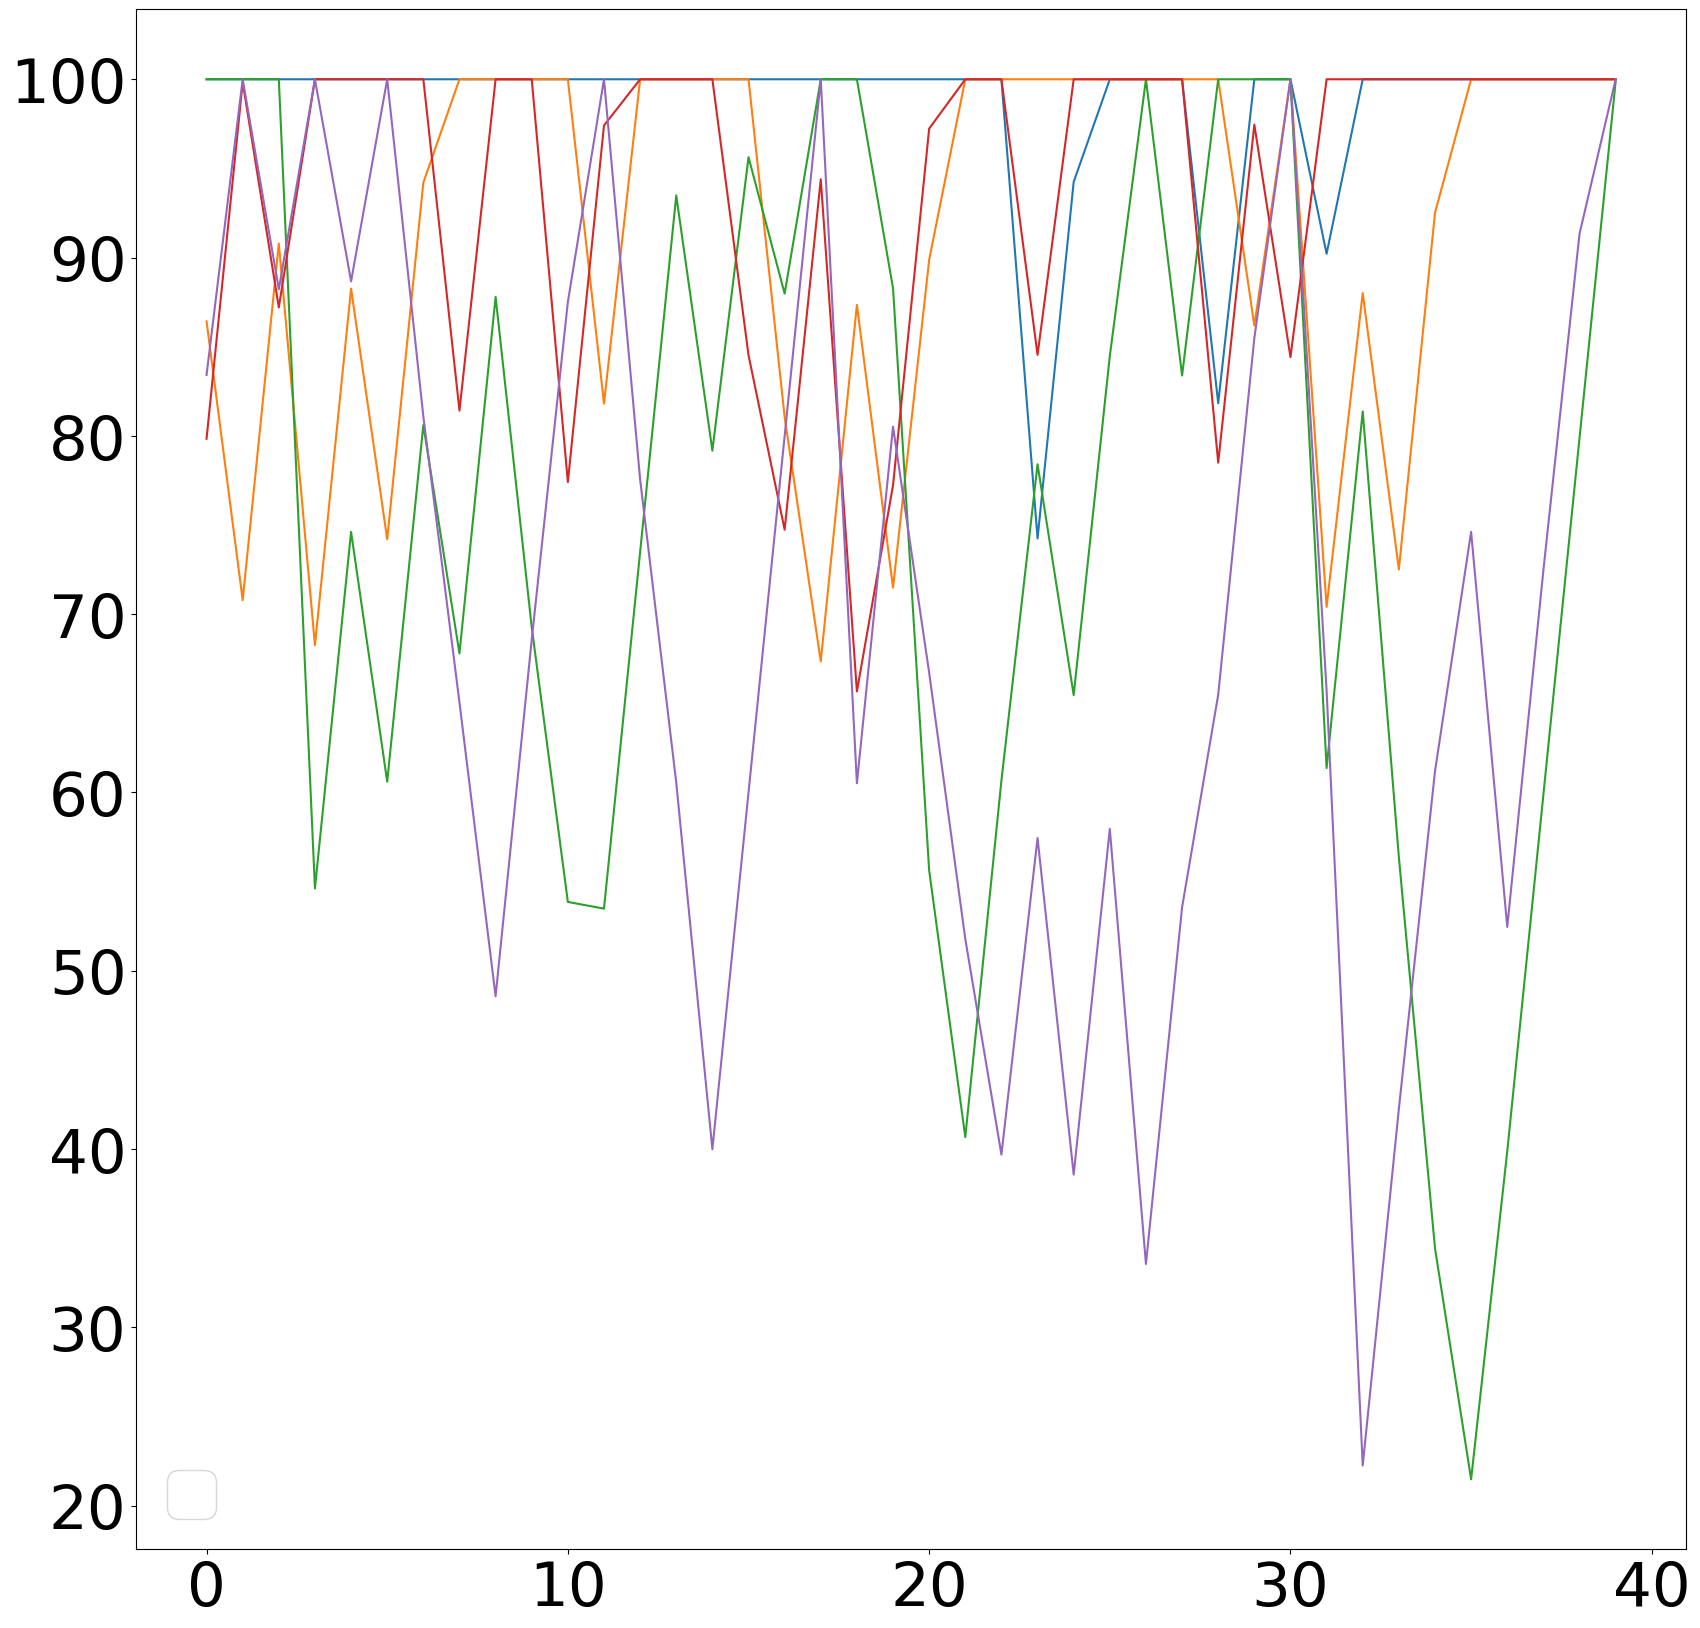

In [147]:
simple_plot_vehicle(vehicles_df_ids, [0,1,2,3,4], "new_charge", fig_size=(20, 20))

In [175]:
simple_plot_vehicle_average_values(vehicles_df_ids, [0,1,2,3,4], "new_charge", fig_size=(20, 20), sli = slice(1,3))

62.74068534063141


In [168]:
slice(1,5).stop

5

# Customer Travel Time